# Numerical Differentiation

## Coding the three methods of numerical differentiation

The simplest possible algorithm, the *forward difference method*, is very similar to the definition of differentiation:

$$
f'(x) = \lim_{x\rightarrow 0}\frac{f(x + h) - f(x)}{h}.
$$

We simply choose a small step $h$ and write

$$
f'(x, h)_\text{FD} = \frac{f(x + h) - f(x)}{h}.
$$

**Writing a function `FD(f, x, h)` to return the derivative of some function `f` at `x` using a step size of `h`.**


In [18]:
def FD(f, x, h):
    f2 = (f(x+h) - f(x))/h
    return f2

Checking my function with the cosine at $x = 0$ and various step sizes

In [19]:
import numpy as np

# true value = 0
print(FD(lambda x: np.cos(x), 0, 0.1))
print(FD(lambda x: np.cos(x), 0, 0.001))
print(FD(lambda x: np.cos(x), 0, 0.00001))
print(FD(lambda x: np.cos(x), 0, 0.0000001))

-0.049958347219741794
-0.0004999999583255033
-5.000000413701855e-06
-4.9960036108132044e-08


A more sophisticated algorithm is the *central difference* method, which eliminates first-order error, so that the error is proportional to $h^2$ rather than $h$. Recall that this method sets

$$
f'(x, h)_\text{CD} = \frac{f(x + \tfrac12h) - f(x - \tfrac12h)}{h}.
$$

**Writing a function `CD(f, x, h)` in the same way.**

In [20]:
def CD(f, x, h):
    f3 = (f(x+0.5*h) - f(x-0.5*h))/h
    return f3

# true value = 0, as you can see this method is more accurate
print(CD(lambda x: np.cos(x), 0, 0.1))
print(CD(lambda x: np.cos(x), 0, 0.001))
print(CD(lambda x: np.cos(x), 0, 0.00001))
print(CD(lambda x: np.cos(x), 0, 0.0000001))

0.0
0.0
0.0
0.0


The final method is the *extrapolated difference* method, in which we combine two iterations of the central difference algorithm to give error proportional to $h^4$:

$$
f'(x, h)_\text{ED} = \tfrac13\big(4f'(x, \tfrac12h)_\text{CD} - f'(x, h)_\text{CD}\big).
$$

**Writing a function `ED(f, x, h)` to use this method.**

In [21]:
def ED(f, x, h):
    f4 = 1/3*(4*CD(f, x, h/2) - CD(f, x, h))
    return f4

In [22]:
# even accurate then central difference method
print(ED(lambda x: np.cos(x), 0, 0.5))

0.0


## Testing the algorithms

Let's test these three algorithms using functions that are easy to differentiate by hand. Specifically, we'll differentiate the functions $\cos(x)$ at $x = 0.1$.  

I will then calculate and print out the relative error $\epsilon$, where
$$
\epsilon = \frac{f'(x)_\text{calculated} - f'(x)_\text{exact}}{f'(x)_\text{exact}},
$$
and finally plot $|\epsilon|$ against $h$ on a log-log plot.

1e-01 fd_estimate =  -0.295028 fd_error =   0.096359
1e-01 cd_estimate =  -0.198338 cd_error =  -0.000331
1e-01 ed_estimate =  -0.198669 ed_error =  -0.000000
1e-02 fd_estimate =  -0.208456 fd_error =   0.009787
1e-02 cd_estimate =  -0.198666 cd_error =  -0.000003
1e-02 ed_estimate =  -0.198669 ed_error =  -0.000000
1e-03 fd_estimate =  -0.199649 fd_error =   0.000980
1e-03 cd_estimate =  -0.198669 cd_error =  -0.000000
1e-03 ed_estimate =  -0.198669 ed_error =  -0.000000
1e-04 fd_estimate =  -0.198767 fd_error =   0.000098
1e-04 cd_estimate =  -0.198669 cd_error =  -0.000000
1e-04 ed_estimate =  -0.198669 ed_error =  -0.000000
1e-05 fd_estimate =  -0.198679 fd_error =   0.000010
1e-05 cd_estimate =  -0.198669 cd_error =  -0.000000
1e-05 ed_estimate =  -0.198669 ed_error =  -0.000000
1e-06 fd_estimate =  -0.198670 fd_error =   0.000001
1e-06 cd_estimate =  -0.198669 cd_error =  -0.000000
1e-06 ed_estimate =  -0.198669 ed_error =  -0.000000
1e-07 fd_estimate =  -0.198669 fd_error =   0.

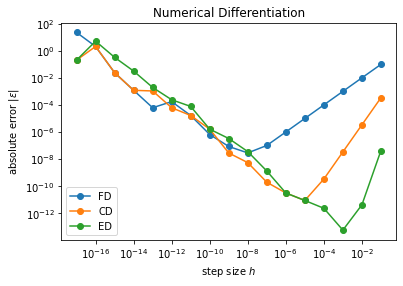

In [23]:
import numpy as np
from numpy import cos, sin, exp, logspace
from matplotlib.pyplot import loglog, xlabel, ylabel, title, legend
%matplotlib inline

# test function = (np.cos)**2
x0 = 0.1       # we evaluate this function at 0.1
fx0p = -2*cos(0.1)*sin(0.1)#cos(0.1)     # true value of the derivative of test function at x0 here

hh = logspace(-1, -17, 17) # same syntax as linspace: this gives us a range from 10^-1 to 10^-17 with 17 points.

fd_errors = []
cd_errors = []
ed_errors = []

for h in hh:
    # All three methods to calculate derivitive of cosx at 0.1 using various step sizes
    fd_estimate = FD(lambda x: np.cos(x)*np.cos(x), x0, h)
    cd_estimate = CD(lambda x: np.cos(x)*np.cos(x), x0, h)
    ed_estimate = ED(lambda x: np.cos(x)*np.cos(x), x0, h)
    
    # calculating epsilon for all methods here.
    fd_error = fx0p - fd_estimate
    cd_error = fx0p - cd_estimate
    ed_error = fx0p - ed_estimate

    print("{:5.0e} fd_estimate = {:10.6f} fd_error = {:10.6f}".format(h, fd_estimate, fd_error))
    print("{:5.0e} cd_estimate = {:10.6f} cd_error = {:10.6f}".format(h, cd_estimate, cd_error))
    print("{:5.0e} ed_estimate = {:10.6f} ed_error = {:10.6f}".format(h, ed_estimate, ed_error))

     # We append the absolute value of epsilon to our list of errors.
    fd_errors.append(abs(fd_error))
    cd_errors.append(abs(cd_error))
    ed_errors.append(abs(ed_error))

loglog(hh, fd_errors, 'o-', label="FD")
loglog(hh, cd_errors, 'o-', label="CD")
loglog(hh, ed_errors, 'o-', label="ED")
xlabel('step size $h$')
ylabel('absolute error $|\epsilon|$')
title('Numerical Differentiation')
legend()

In [24]:
fd_estimate = FD(lambda x: np.cos(x), x0, h = 1e-14)
fd_error = fx0p - fd_estimate
print('error for very small h= ', fd_error)

fd_estimate = FD(lambda x: np.cos(x), x0, h = 1e-8)
fd_error = fx0p - fd_estimate
print('error for large enough h= ', fd_error)

error for very small h=  -0.09874925857879716
error for large enough h=  -0.0988359003836389


## Types of error
There are two main types of error associted in numerical solutions here. There are errors associated with the approximate relation of the method to calculate the derivatives.  These algorithmic errors depend on the nature of the approximation and generally get smaller as the step size ($h$) decreases.

There are also errors from subtractive cancellation that result from taking the differences between floating point numbers. These fractional errors typically grow when the two numbers being subtracted from each other are nearly equal.  Clearly this is the case when computing derivatives.

You can get an approximate sense of how subtractive cancellation as a function of $h$ by examining the following function numerically,
$$
sc(h) = (1.+h) - 1.
$$
Clearly the mathematical answer is $h$.  However, when computing this numerically we get substantial cancellation errors when $h$ is much smaller than the number we are adding it to; or equivalently when the two numbers being subracted are very similar in value.

An example is included below.



In [25]:
h = 1.e-6
(h - (1+h-1))/h   # fractional error

8.226659269441623e-11

Computing and plotting the approximate scaling of the fractional error due to subtractive cancellation by using the following
$$
\mbox{Fractional Error} = \left| \frac{h - (1+h-1)}{h} \right|.
$$

1e-01 8.3266726846886741e-16 
1e-02 8.6736173798840355e-16 
1e-03 1.1015494072452725e-13 
1e-04 1.1018204577883939e-13 
1e-05 6.5511222206542089e-12 
1e-06 8.2266592694416225e-11 
1e-07 5.8386722208067770e-10 
1e-08 6.0774709918447105e-09 
1e-09 8.2740370936808782e-08 
1e-10 8.2740370962658176e-08 
1e-11 8.2740371059593408e-08 
1e-12 8.8900582341031726e-05 
1e-13 7.9927783735914398e-04 
1e-14 7.9927783735911243e-04 
1e-15 1.1022302462515646e-01 
1e-16 1.0000000000000000e+00 
1e-17 1.0000000000000000e+00 


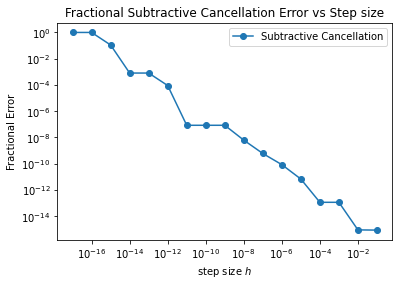

In [26]:
hh = logspace(-1, -17, 17)

sc_errors = []  # subtractive cancellation fractional error

for h in hh:
    sc_error = abs((h-(1+h-1))/h)    # expression for fractional error due to subtractive cancellation
    print("{:5.0e} {:>21.16e} ".format(h, sc_error))
    sc_errors.append(abs(sc_error))

loglog(hh, sc_errors, 'o-', label="Subtractive Cancellation")
xlabel('step size $h$')
ylabel('Fractional Error')
title('Fractional Subtractive Cancellation Error vs Step size')
legend()